In [10]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return np.linalg.norm(residual)**2

def grad_f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return 2 * np.dot(np.transpose(A), residual)

def calculate_alpha(f, x_k, A, b):
    """
    Calculate the step size alpha using the formula:
    alpha = (g_k.T @ g_k) / (g_k.T @ Q @ g_k)
    where g_k is the gradient of the function f at x_k, and Q = g_k^2.

    Parameters:
    f (function): The objective function.
    x_k (np.ndarray): The current point.

    Returns:
    float: The calculated step size alpha.
    """
    # Calculate the gradient g_k at x_k
    g_k = grad_f(A, x_k, b)
    
    # Calculate Q as the square of the gradient
    Q = np.outer(g_k, g_k)
    
    # Calculate the numerator and denominator
    numerator = np.dot(np.transpose(g_k), g_k)
    denominator = np.dot(np.transpose(g_k), np.dot(Q, g_k))
    
    # Ensure the denominator is not zero to avoid division by zero
    if denominator == 0:
        raise ValueError("The denominator for calculating alpha is zero.")
    
    alpha = numerator / denominator
    return alpha

def steepest_descent(f, grad_quadratic, x0, A, b, tol=0.7, max_iter=4000):
    x = x0
    minimum_values = []  # List to store the minimum values in each iteration
    for i in range(max_iter):
        gradient = grad_quadratic(A, x, b)  # Pass A and b to grad_quadratic
        if np.linalg.norm(gradient) < tol:
            print("Converged after", i, "iterations.")
            return x, minimum_values
        alpha = calculate_alpha(f, x, A, b)
        x = x - alpha * gradient
        minimum_values.append(f(A, x, b))  # Append the minimum value to the list
    print("Did not converge after", max_iter, "iterations.")
    return x, minimum_values

Did not converge after 4000 iterations.
Minimum: [[ 2.27204685]
 [-0.8565484 ]
 [ 0.51985982]
 [-0.52797471]
 [-0.86881327]
 [-0.00963642]
 [ 0.13760148]
 [ 2.90575775]
 [-0.18537329]
 [-1.13076241]
 [ 0.27527136]
 [-2.07463403]
 [-0.08782086]
 [ 0.01761694]
 [ 0.79253686]
 [ 0.96831396]
 [-0.50218332]
 [-0.15022234]
 [-0.76401704]
 [-1.1262625 ]
 [ 0.30903257]
 [-1.26860727]
 [-0.41894396]
 [-0.99123183]
 [ 0.55481226]
 [ 1.794149  ]
 [-1.30127535]
 [-1.84966215]
 [-0.1241033 ]
 [ 0.01716279]
 [ 0.21887644]
 [-0.44563109]
 [-0.19775223]
 [ 0.37055715]
 [ 1.03868968]
 [-1.95964992]
 [-0.36484919]
 [ 0.21593285]
 [-0.9152903 ]
 [ 1.7307132 ]
 [-0.63455853]
 [-0.04281206]
 [ 0.55575538]
 [-0.59277707]
 [-1.84160832]
 [-0.42705292]
 [ 1.02467775]
 [-0.33554192]
 [-0.84599383]
 [ 0.92448458]]


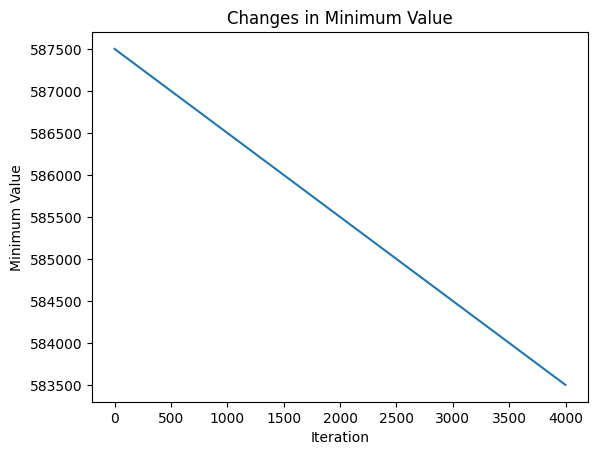

In [11]:
m = int(input("please enter n")) 
n = int(input("please enter m"))

# Generate random A, x, and b
np.random.seed(42)
A = 10 * (np.random.randn(m, n) - np.random.randn(m, n))
x_true = np.random.randn(n, 1) - np.random.randn(n, 1)
b = np.dot(A, x_true) + 0.01 * np.eye(m).dot(np.maximum(np.dot(A, x_true) - np.random.randn(m, 1), 0))

# Initial guess
x0 = np.random.randn(n, 1)

d = -grad_f(A, x0, b)
minimum, minimum_values = steepest_descent(f, grad_f, x0, A, b)
print("Minimum:", minimum)

# Plot the changes in the minimum value
plt.plot(range(len(minimum_values)), minimum_values)
plt.xlabel('Iteration')
plt.ylabel('Minimum Value')
plt.title('Changes in Minimum Value')
plt.show()